### Noah Collin<p>
Data 602<p>
Fall 2022

prompt: https://colab.research.google.com/drive/13W7_I5PlFhmDzJ14Sft2MQLB4VPhL5ft?usp=sharing

In [2]:
# core
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# ml
from sklearn import datasets as ds
from sklearn import linear_model as lm
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.model_selection import train_test_split as tts

import plotly

In [3]:
iris = ds.load_iris()
boston = ds.load_boston()

C:\Users\NColl\anaconda3\envs\NLTK-etal\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California hou

## Iris

In [4]:
type(iris)
X = iris.data
y = iris.target
irisDataDict = {}
for i in range(len(iris.feature_names)):
    irisDataDict[iris.feature_names[i]] = np.array(iris.data[:,i])

irisData = pd.DataFrame(irisDataDict)

#### Q1
Return the first 5 rows of the data including the 
#feature names as column headings in a DataFrame and a separate Python list containing target names


irisData.head()

In [6]:
#... separate Python list containing target names
[iris.target_names[i] for i in  iris.target[:5]]

['setosa', 'setosa', 'setosa', 'setosa', 'setosa']

#### Q2

Data set: Iris

    Fit the Iris dataset into a kNN model with neighbors=5 and predict the category of observations passed in argument new_observations. Return back the target names of each prediction (and not their encoded values, i.e. return setosa instead of 0).

In [7]:
knn = KNN(n_neighbors=5)
knn.fit(X, y)
y_preds = knn.predict(X)
q2Answer = [iris.target_names[i] for i in y_preds]
q2Answer

['setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'versicolor',
 'versicolor',
 'versicolor',
 'versicolor',
 'versicolor',
 'versicolor',
 'versicolor',
 'versicolor',
 'versicolor',
 'versicolor',
 'versicolor',
 'versicolor',
 'versicolor',
 'versicolor',
 'versicolor',
 'versicolor',
 'versicolor',
 'versicolor',
 'versicolor',
 'versicolor',
 'virginica',
 'versicolor',
 'virginica',
 'versicolor',
 'versicolor',
 'versicolor',
 'versicolor',
 'versicolor',
 'versicolor',
 'versicolor',
 '

#### Q3

Data set: Iris

    Split the Iris dataset into a train / test model with the split ratio between the two 
    established by the function parameter split.

    Fit KNN with the training data with number of neighbors equal to the function parameter neighbors

    Generate and return back an accuracy score using the test data that was split out



In [8]:
train_X, test_X, train_y, test_y = tts(iris.data, iris.target, shuffle=True, 
                                       random_state=42, test_size=.2, stratify=iris.target)
no_neighbs = 7
knn = KNN(n_neighbors=no_neighbs).fit(train_X, train_y)

score = knn.score(test_X, test_y)
score

0.9666666666666667

#### Q4

Data set: Iris

    Generate an overfitting / underfitting curve of kNN each of the testing and training accuracy performance scores series for a range of neighbor (k) values from 1 to 30 and plot the curves (number of neighbors is x-axis, performance score is y-axis on the chart).



In [9]:
train_accuracies = {} 
test_accuracies = {} 
neighbors = np.arange(1, 31) 
for neighbor in neighbors: 
    knn = KNN(n_neighbors=neighbor)
    knn.fit(train_X, train_y) 
    train_accuracies[neighbor] = knn.score(train_X, train_y) 
    test_accuracies[neighbor] = knn.score(test_X, test_y)

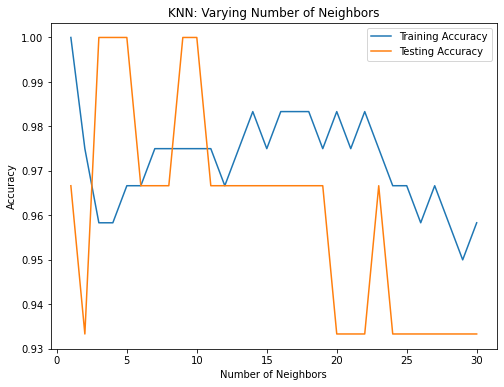

In [10]:
plt.figure(figsize=(8, 6)) 
plt.title("KNN: Varying Number of Neighbors") 
plt.plot(neighbors, train_accuracies.values(), label="Training Accuracy") 
plt.plot(neighbors, test_accuracies.values(), label="Testing Accuracy") 
plt.legend() 
plt.xlabel("Number of Neighbors") 
plt.ylabel("Accuracy") 
plt.show()

I suppose 30 is a good number of neighbors where the training score has slightly increased after a decrease and the testing score has stablized.  

## Boston

#### Q5

Data set: Boston

    Load sklearn's Boston data into a DataFrame (only the data and feature_name as column names)

    Load sklearn's Boston target values into a separate DataFrame

    Return back the average of AGE, average of the target (median value of homes or MEDV), and the target as NumPy values


In [11]:
BostonDataDict = {}
for i in range(len(boston.feature_names)):
    BostonDataDict[boston.feature_names[i]] = boston.data[:,i]
BostonDataDF = pd.DataFrame(BostonDataDict)
BostonTargetDF = pd.DataFrame({"Target": boston.target}) #...into a seprate dataframe...
BostonDataDF.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [12]:
BostonTargetDF.head()

,Target
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


In [13]:
#Return back the average of AGE, average of the target (median value of homes or MEDV), 
#and the target as NumPy values
answer5DF = {"Average_Age": np.array(BostonDataDF["AGE"]).mean(),
             "Median Value of homes": np.median(list(BostonTargetDF.Target) ),
             "Boston Target" : BostonTargetDF.Target
                         }
answer5DF

{'Average_Age': 68.57490118577076,
 'Median Value of homes': 21.2,
 'Boston Target': 0      24.0
 1      21.6
 2      34.7
 3      33.4
 4      36.2
        ... 
 501    22.4
 502    20.6
 503    23.9
 504    22.0
 505    11.9
 Name: Target, Length: 506, dtype: float64}

#### Q6

Data set: Boston

    In the Boston dataset, the feature PTRATIO refers to pupil teacher ratio.

    Using a matplotlib scatter plot, plot MEDV median value of homes as y-axis and PTRATIO as x-axis

    Return back PTRATIO as a NumPy array

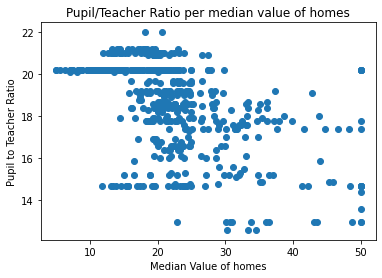

In [14]:
plt.scatter(BostonTargetDF.Target , np.array(BostonDataDF["PTRATIO"]), )
plt.title("Pupil/Teacher Ratio per median value of homes")
plt.xlabel("Median Value of homes")
plt.ylabel("Pupil to Teacher Ratio")
#plt.legend(BostonDataDF.CRIM)

plt.show();

In [15]:
# Part 2 of Q6:
np.array(BostonDataDF["PTRATIO"])

array([15.3, 17.8, 17.8, 18.7, 18.7, 18.7, 15.2, 15.2, 15.2, 15.2, 15.2,
       15.2, 15.2, 21. , 21. , 21. , 21. , 21. , 21. , 21. , 21. , 21. ,
       21. , 21. , 21. , 21. , 21. , 21. , 21. , 21. , 21. , 21. , 21. ,
       21. , 21. , 19.2, 19.2, 19.2, 19.2, 18.3, 18.3, 17.9, 17.9, 17.9,
       17.9, 17.9, 17.9, 17.9, 17.9, 17.9, 16.8, 16.8, 16.8, 16.8, 21.1,
       17.9, 17.3, 15.1, 19.7, 19.7, 19.7, 19.7, 19.7, 19.7, 18.6, 16.1,
       16.1, 18.9, 18.9, 18.9, 19.2, 19.2, 19.2, 19.2, 18.7, 18.7, 18.7,
       18.7, 18.7, 18.7, 19. , 19. , 19. , 19. , 18.5, 18.5, 18.5, 18.5,
       17.8, 17.8, 17.8, 17.8, 18.2, 18.2, 18.2, 18. , 18. , 18. , 18. ,
       18. , 20.9, 20.9, 20.9, 20.9, 20.9, 20.9, 20.9, 20.9, 20.9, 20.9,
       20.9, 17.8, 17.8, 17.8, 17.8, 17.8, 17.8, 17.8, 17.8, 17.8, 19.1,
       19.1, 19.1, 19.1, 19.1, 19.1, 19.1, 21.2, 21.2, 21.2, 21.2, 21.2,
       21.2, 21.2, 21.2, 21.2, 21.2, 21.2, 21.2, 21.2, 21.2, 21.2, 14.7,
       14.7, 14.7, 14.7, 14.7, 14.7, 14.7, 14.7, 14

#### Q7

Data set: Boston

    Create a regression model for MEDV / PTRATIO and display a chart showing the regression line using matplotlib

    Use np.linspace() to generate prediction X values from min to max PTRATIO

    Return back the regression prediction space and regression predicted values

    Make sure to labels axes appropriately



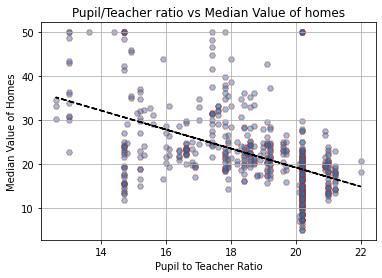

In [41]:
# https://www.python-graph-gallery.com/scatterplot-with-regression-fit-in-matplotlib
# Initialize layout
#fig, ax = plt.subplots(figsize = (9, 9))
x = BostonDataDF['PTRATIO']
y = BostonTargetDF

plt.scatter(x, y, marker = "H", edgecolors = 'brown', alpha = .45)
plt.title("Pupil/Teacher ratio vs Median Value of homes")

m,b = np.polyfit(x, y, 1)
plt.plot(x, x*m+b, '--k')

plt.xlabel("Pupil to Teacher Ratio")
plt.ylabel("Median Value of Homes")
plt.grid()
plt.show()